# Importamos las librerías necesarias

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pprint

# Leemos, extraemos datos y hacemos dos copias


In [233]:
data = pd.read_csv('ufo_sighting_data.csv')
df = pd.DataFrame(data)
ufo = data.copy()
ufo2 = data.copy()
ufo.head()

,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,described_duration_of_encounter,description,date_documented,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


# Comprobamos valores nulos

In [234]:
ufo.isnull().sum()

Date_time                             0
city                                  0
state/province                     5797
country                            9670
UFO_shape                          1932
length_of_encounter_seconds           0
described_duration_of_encounter       0
description                          15
date_documented                       0
latitude                              0
longitude                             0
dtype: int64

# Limpiamos la segunda copia de datos (ufo2)

In [235]:
ufo2 = ufo2.drop(ufo2[(ufo2['state/province'].isnull()) |
                      (ufo2['country'].isnull()) | 
                      (ufo2['UFO_shape'].isnull()) | 
                      (ufo2['description'].isnull()) ].index)

# Nuestro estudio se va a centrar por una parte en las latitudes y por otra parte en los meses y en los años


## Tratamiento de las fechas

## Funciones procedentes del refactor del análisis y que utilizaremos

In [236]:
def applyToInt(df, col):
    return [int(item) for item in df[col]]

def applyToFloat(df, col):
    return [float(item) for item in df[col]]

def converItemNumberType(df, col, typ):
    return [typ(item) for item in df[col]]

def extractByIndexAndSeparator(df, col, separator, index):
    return [item.split(separator)[index] for item in df[col]]

def splitDataBySeparator(df, col, separator):
    return [item.split(separator) for item in df[col]]

def extractItemByIndex(df, col, index):
    return [item[index] for item in df[col]]

def getFrequencies(df, col):
    dictionary = {}
    sorted_df_col = sorted(df[col])
    unique_items = set(df[col])
    for item in unique_items:
        dictionary[item] = sorted_df_col.count(item)
    
    return dictionary

### Obtenemos las fechas y las horas a partir de Date_time

In [237]:
ufo['Date'] = extractByIndexAndSeparator(ufo, 'Date_time', ' ', 0)
ufo['time'] = extractByIndexAndSeparator(ufo, 'Date_time' , ' ', 1)
ufo['Date'] = ufo['Date'].str.strip()

ufo2['Date'] = extractByIndexAndSeparator(ufo2, 'Date_time', ' ', 0)
ufo2['time'] = extractByIndexAndSeparator(ufo2, 'Date_time' , ' ', 1)

### Obtenemos los meses y los años a partir de Date

In [238]:
ufo['months_aux'] = splitDataBySeparator(ufo,'Date', '/')
ufo['months'] = extractItemByIndex(ufo, 'months_aux', 0 )
ufo['years'] = extractItemByIndex(ufo, 'months_aux', 2 )
ufo['years'] = converItemNumberType(ufo, 'years', int)
annual_freq = getFrequencies(ufo, 'years')

ufo2['months_aux'] = splitDataBySeparator(ufo2,'Date', '/')
ufo2['months']= extractItemByIndex(ufo2, 'months_aux', 0 )
ufo2['years'] = extractItemByIndex(ufo2, 'months_aux', 2 )
ufo2['years'] = converItemNumberType(ufo2, 'years', int)
ufo2['months'] = converItemNumberType(ufo2, 'months', int)
annual_freq2 = getFrequencies(ufo2, 'years')
monthly_freq2 = getFrequencies(ufo2, 'months')
ufo2.count()

Date_time                          66516
city                               66516
state/province                     66516
country                            66516
UFO_shape                          66516
length_of_encounter_seconds        66516
described_duration_of_encounter    66516
description                        66516
date_documented                    66516
latitude                           66516
longitude                          66516
Date                               66516
time                               66516
months_aux                         66516
months                             66516
years                              66516
dtype: int64

## Tratamiento de las latitudes

In [239]:
ufo2['latitude'].nunique() == ufo['latitude'].nunique()
ufo2['latitude'].nunique()
ufo_removed_latitudes = [item for item in ufo['latitude'] if item not in ufo2['latitude']]

len(ufo_removed_latitudes)
ufo['latitude'].nunique()
removed_latitudes_length = len(ufo_removed_latitudes)
removed_latitudes_unique_length = len(set(ufo_removed_latitudes))
removed_latitudes_unique_length
ufo_removed_unique_latitudes = set(ufo_removed_latitudes)
ufo_removed_unique_latitudes
ufo['latitude'] = [str(item).replace('q', '') for item in ufo['latitude']]
ufo2['latitude'] = [str(item).replace('q', '') for item in ufo2['latitude']]
ufo['latitude'] = converItemNumberType(ufo, 'latitude', float)
lat_int = applyToFloat(ufo2, 'latitude')
lat_int_dict = getFrequencies(ufo, 'latitude')
sorted_lat_int = sorted(lat_int)
ufo_freq_per_latitude = getFrequencies(ufo, 'latitude')
ufo2['longitude'].value_counts()

def getTuplaPlainCoordinates(df, lat, long):
    return list(zip(df[lat], df[long]))

def getTruncateValues(df, col, decimals):
    return [round(float(item),decimals) for item in df[col]]


ufo2['points'] = list(zip(ufo2['latitude'], ufo2['longitude']))
ufo2['points'] 
ufo2['latitude'] = getTruncateValues(ufo2, 'latitude', 2)
ufo2['longitude'] = getTruncateValues(ufo2, 'longitude', 2)
ufo2['longitude']
group = ufo2.groupby(by = ['latitude', 'longitude', 'UFO_shape']).apply(lambda x: x.sort_values(by = 'longitude', ascending = False))  
group

Date_time  \
latitude longitude UFO_shape                           
-37.81    144.96   disk      21335  12/30/2005 13:25   
-34.93    138.60   circle    58373   7/20/2006 14:00   
                   light     78037   9/27/2008 00:30   
-34.85    138.47   light     74289   9/14/1996 23:30   
-31.95    115.86   rectangle 31973   3/16/2014 01:00   
-31.43    152.91   circle    48068   6/12/2002 22:00   
-27.42    117.90   light     6216    10/3/2013 22:00   
-26.66    153.10   diamond   20539  12/25/2010 21:45   
-12.46    130.84   chevron   2060   10/15/2002 20:30   
                   other     49178   6/15/2000 21:30   
 17.97   -66.91    oval      32011   3/17/2001 04:00   
         -66.06    triangle  8305    11/1/2002 23:30   
 18.01   -66.61    sphere    24133   1/31/1974 15:00   
 18.05   -67.06    disk      50354   6/20/1999 20:45   
 18.19   -66.31    other     55902   7/13/1970 19:00   
         -65.96    formation 7437    1/10/1999 01:00   
 18.20   -67.14    oval      78838    9/3/1972 15:00   
 18.23   -65.92    light     49702   6/17/2002 02:50   
 18.27   -66.70    unknown   47513    6/1/1992 02:00   
 18.30   -66.88    cigar     73077   9/11/2000 22:10   
 18.34   -67.25    circle    36827   4/15/1983 21:00   
 18.36   -66.01    oval      48768   6/15/1975 20:00   
 18.38   -65.90    other     47588    6/1/1995 02:30   
         -65.83    diamond   41655    5/1/2002 18:00   
                   unknown   40284    4/5/1995 00:00   
 18.40   -67.11    unknown   9350   11/15/1989 23:00   
         -66.05    oval      47095    6/1/1973 18:00   
 18.41   -66.33    sphere    36065    4/1/1998 20:00   
         -66.08    cross     21436  12/31/1997 21:05   
 18.45   -66.39    cigar     298    10/11/1998 14:05   
...                                              ...   
 64.84   -147.72   other     14050   1/13/2005 20:00   
                             14055   1/13/2005 21:00   
                   oval      20576  12/25/2012 16:30   
                             22347   1/24/2009 18:00   
                             25187    1/8/1998 22:38   
                             38277    4/2/2000 18:00   
                             73892   9/12/2004 03:00   
                   sphere    20287  12/24/2011 02:00   
                             29598    2/6/2006 12:00   
                             34626    3/4/1999 21:00   
                   triangle  27655   2/21/1999 22:30   
                   unknown   17073  12/10/2013 23:15   
                             19289  12/20/2004 20:00   
                             21201  12/29/2008 15:00   
                             25768   2/11/2011 08:00   
                             25810    2/1/1954 02:00   
                             61325    7/3/2008 16:40   
                             79029    9/3/2012 21:57   
 64.85   -148.01   flash     28656   2/26/2005 05:40   
 64.89   -163.68   oval      51700   6/25/2003 00:00   
 65.18   -123.42   changing  12034   11/2/2007 05:00   
 65.26   -166.36   disk      56728   7/15/1987 01:30   
                   oval      50296   6/20/1986 23:30   
 66.90   -162.60   disk      2719   10/18/2002 05:30   
 67.01   -146.42   circle    19161    1/2/2009 21:00   
 69.45   -133.07   disk      26049   2/12/1999 23:10   
 70.13   -143.62   light     17515   12/1/2009 16:00   
 70.64   -160.04   light     19087    1/2/2002 21:32   
 72.70   -78.00    circle    18103  12/14/2004 23:30   
                             40701    4/7/2006 22:44   

                                                                     city  \
latitude longitude UFO_shape                                                
-37.81    144.96   disk      21335                  melbourne (australia)   
-34.93    138.60   circle    58373            adelaide  (south australia)   
                   light     78037            adelaide  (south australia)   
-34.85    138.47   light     74289        port adelaide (south australia)   
-31.95    115.86   rectangle 31973              pert

# _"En algún lugar algo increíble está esperando ser descubierto"_ (Carl Sagan)


In [291]:
ufo_freq_per_latitude = getFrequencies(ufo, 'latitude')
ufo_freq_per_latitude
ufo_freq_per_longitude = getFrequencies(ufo2, 'longitude')
ufo_freq_per_longitude.head()

AttributeError: 'dict' object has no attribute 'head'

[-37.813938,
 -34.928661,
 -34.928661,
 -34.85,
 -31.95224,
 -31.43084,
 -27.42395,
 -26.66008,
 -12.45722,
 -12.45722,
 17.9677778,
 17.9736111,
 18.0130556,
 18.0519444,
 18.1886111,
 18.1913889,
 18.203055600000003,
 18.2294444,
 18.2675,
 18.2966667,
 18.3422222,
 18.3566667,
 18.3811111,
 18.3822222,
 18.3822222,
 18.3966667,
 18.3994444,
 18.4136111,
 18.4141667,
 18.4463889,
 18.4683333,
 18.4683333,
 18.4744444,
 18.5027778,
 19.0638889,
 19.4269444,
 19.4269444,
 19.4308333,
 19.4969444,
 19.4969444,
 19.4975,
 19.4975,
 19.4975,
 19.4975,
 19.506111100000002,
 19.6036111,
 19.6227778,
 19.6227778,
 19.6255556,
 19.6255556,
 19.6255556,
 19.6255556,
 19.6255556,
 19.625555600000002,
 19.625555600000002,
 19.625555600000002,
 19.6455556,
 19.7297222,
 19.7297222,
 19.7297222,
 19.7297222,
 19.7297222,
 19.7297222,
 19.7297222,
 19.7297222,
 19.7297222,
 19.7297222,
 19.7297222,
 19.8875,
 19.8997222,
 19.9430556,
 19.9430556,
 20.0005556,
 20.0827778,
 20.2338889,
 20.2413889,


In [ ]:
ufo2['UFO_shape'].value_counts()
group_shape = ufo2.groupby(by = ['latitude', 'UFO_shape']).apply(lambda x: x.sort_values(by = 'latitude', ascending = False))
group_shape.head()



## ¿Qué pasa si investigamos countries?




In [53]:
ufo2['country'].value_counts()

us    63553
ca     2942
gb       11
au       10
Name: country, dtype: int64

In [241]:
def filter_dataframe_by_column_value(df, col, value):
    return df[df[col] == value]

australian_ufos = ufo[ufo['country'] == 'au']
australian_ufos.drop(['described_duration_of_encounter', 'state/province', 'months_aux'], axis ='columns', inplace = True)
australian_ufos['UFO_shape'].value_counts()
australian_ufos['length_of_encounter_seconds'] = converItemNumberType(australian_ufos, 'length_of_encounter_seconds', float)
australian_ufos.drop(
    australian_ufos[(australian_ufos['UFO_shape'] == 'unknown') & 
                    (australian_ufos['length_of_encounter_seconds'] < 300)].index)
australian_ufos['length_of_encounter_seconds'].value_counts()



/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


300.00        71
600.00        58
60.00         43
120.00        36
180.00        30
5.00          29
900.00        27
10.00         26
30.00         25
240.00        16
20.00         15
3600.00       13
1200.00       13
15.00         11
1800.00        9
3.00           9
7200.00        8
45.00          8
2.00           8
90.00          7
2700.00        6
480.00         6
420.00         6
360.00         5
6.00           5
4.00           4
1.00           4
720.00         4
10800.00       3
7.00           3
0.50           2
25.00          2
18000.00       2
1500.00        2
9000.00        1
5400.00        1
21.45          1
989.00         1
1209600.00     1
540.00         1
14400.00       1
86400.00       1
40.00          1
990.00         1
12.00          1
37800.00       1
1300.00        1
35.00          1
8.00           1
23.00          1
50.00          1
2400.00        1
32.00          1
36.00          1
9.00           1
345600.00      1
Name: length_of_encounter_seconds, dtype: int64

In [292]:
aus_ufos = getFrequencies(australian_ufos, 'length_of_encounter_seconds')



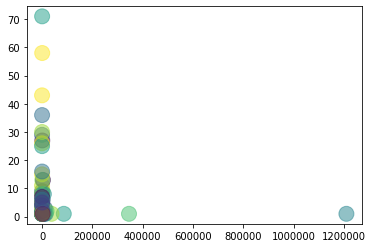

In [293]:
import numpy as np
import matplotlib.pyplot as plt
N = 56
x = lol.keys()
y = lol.values()
colors = np.random.rand(N)
area = (15)**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

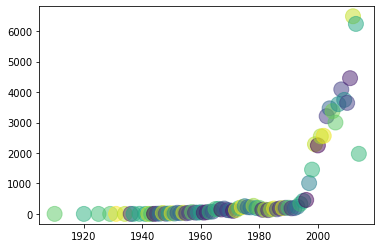

{1: 4596,
 2: 3817,
 3: 4482,
 4: 4509,
 5: 4346,
 6: 6607,
 7: 7972,
 8: 7152,
 9: 6360,
 10: 6321,
 11: 5702,
 12: 4652}

In [284]:
import numpy as np
import matplotlib.pyplot as plt

N = 83
x = annual_freq2.keys()
y = annual_freq2.values()
colors = np.random.rand(N)
area = (15)**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()
monthly_freq2

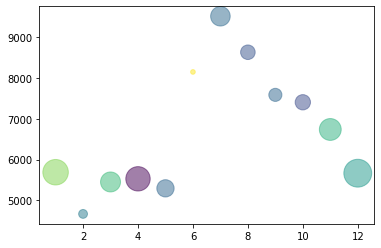

In [213]:
import numpy as np
import matplotlib.pyplot as plt

N = 12

x = monthly_freq2.keys()
y = monthly_freq2.values()
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()


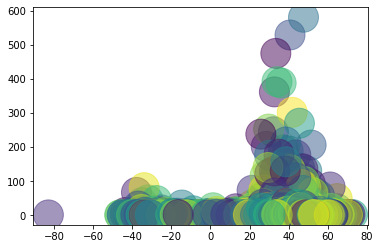

In [285]:
import numpy as np
import matplotlib.pyplot as plt

N = 19907

x = pep.keys()
y = pep.values()
colors = np.random.rand(N)
area = (30)**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

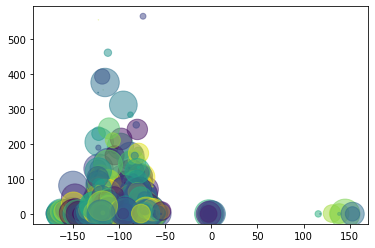

In [217]:
import numpy as np
import matplotlib.pyplot as plt

N = 4665

x = jon.keys()
y = jon.values()
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

In [260]:
def filter_dataframe_by_column_value(df, col, value):
    return df[df[col] == value]

gb_ufos = ufo[ufo['country'] == 'gb']
gb_ufos.drop(['described_duration_of_encounter', 'state/province', 'months_aux'], axis ='columns', inplace = True)
gb_ufos['UFO_shape'].value_counts()
gb_ufos['length_of_encounter_seconds'] = converItemNumberType(gb_ufos, 'length_of_encounter_seconds', float)
gb_ufos.drop(
    gb_ufos[(gb_ufos['UFO_shape'] == 'unknown') & 
                    (gb_ufos['length_of_encounter_seconds'] < 300)].index)


gb = getFrequencies(gb_ufos, 'length_of_encounter_seconds')


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


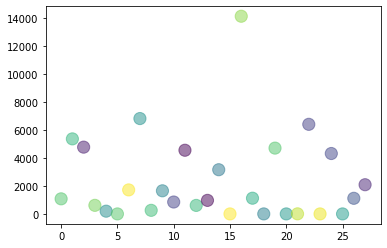

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


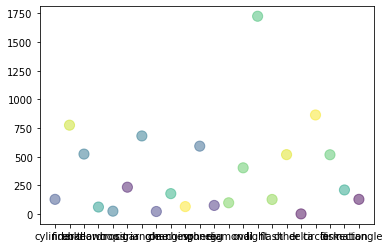

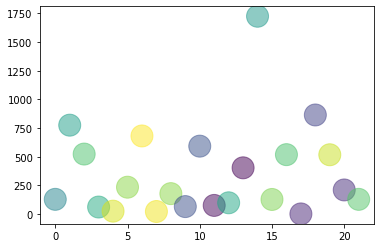

dict_values([129, 776, 524, 62, 26, 235, 682, 23, 179, 66, 593, 76, 99, 404, 1726, 128, 519, 2, 865, 518, 211, 129])

In [290]:
ufo2['UFO_shape']=ufo2['UFO_shape'].astype('category')
ufo2['UFO_shape'].value_counts()


def get_frequencies_from_string_data(df, col):
    dictionary = {}
    my_list = list(df[col])
    unique_items = set(df[col])
    for item in unique_items:
        dictionary[item] = my_list.count(item)
    
    return dictionary

lulu = get_frequencies_from_string_data(ufo2, 'UFO_shape')
lulu_keys = list(lulu.keys())

def get_list_indexes(our_list):
    return [our_list.index(item) for item in our_list]

lili = get_list_indexes(lulu_keys)

N = 28
x = lili
y = lulu.values()
colors = np.random.rand(N)
area = (28)**1.5 # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()
lulu.keys()


jul
def filter_dataframe_by_column_value(df, col, value):
    return df[df[col] == value]

jul = filter_dataframe_by_column_value(ufo2, 'months', 7)
jul['UFO_shape']=jul['UFO_shape'].astype('category')
jul['UFO_shape']
jul_ufo_shapes = get_frequencies_from_string_data(jul, 'UFO_shape')

jul_ufo_shapes


N = 22
x = jul_ufo_shapes.keys()
y = jul_ufo_shapes.values()
colors = np.random.rand(N)
area = (22)**1.5 # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()
lulu.keys()

jul_ufo_keys  = list(jul_ufo_shapes.keys())
july = get_list_indexes(jul_ufo_keys)
N = 22
x = july
y = jul_ufo_shapes.values()
colors = np.random.rand(N)
area = (22)**2 # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()
lulu.keys()

jul_ufo_keys  = list(jul_ufo_shapes.keys())
july = get_list_indexes(jul_ufo_keys)
jul_ufo_keys
jul_ufo_shapes.values()